In [1]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type.csv')

# Show first few rows
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [4]:
print("Rows, Columns:", df.shape)

Rows, Columns: (1918, 7)


In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [6]:
df['Other'] = df['Other'].fillna(0)


In [7]:
print("\nData types:\n", df.dtypes)


Data types:
 Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object


In [8]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.937956
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.761911
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [9]:

sns.set(style="whitegrid")


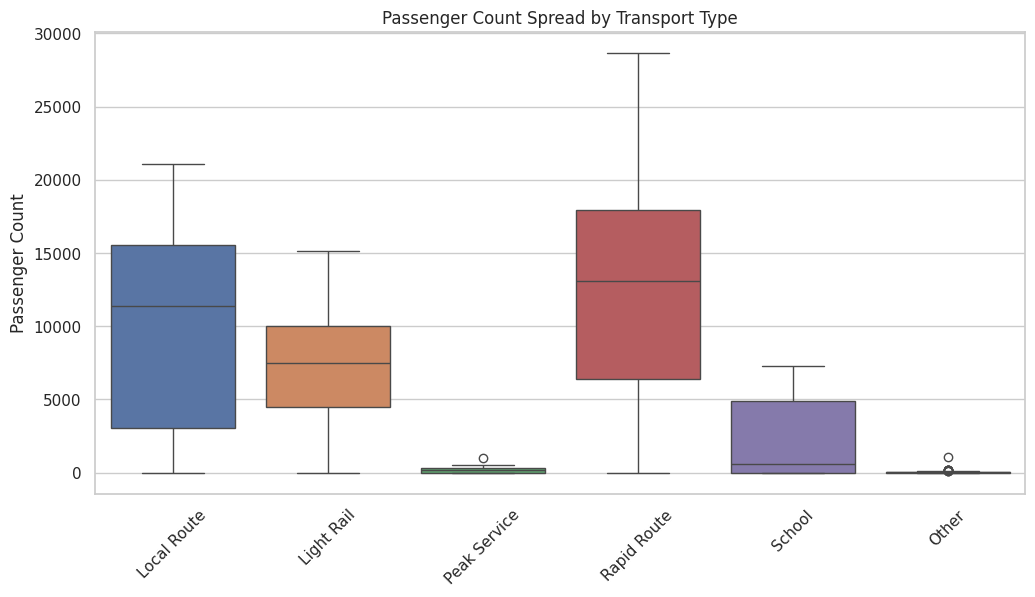

In [10]:
#represent consistent of Light Rail serveices


columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Plot
plt.figure(figsize=(12, 6))

plt.title("Passenger Count Spread by Transport Type")
plt.ylabel("Passenger Count")
plt.xticks(rotation=45)
plt.show()


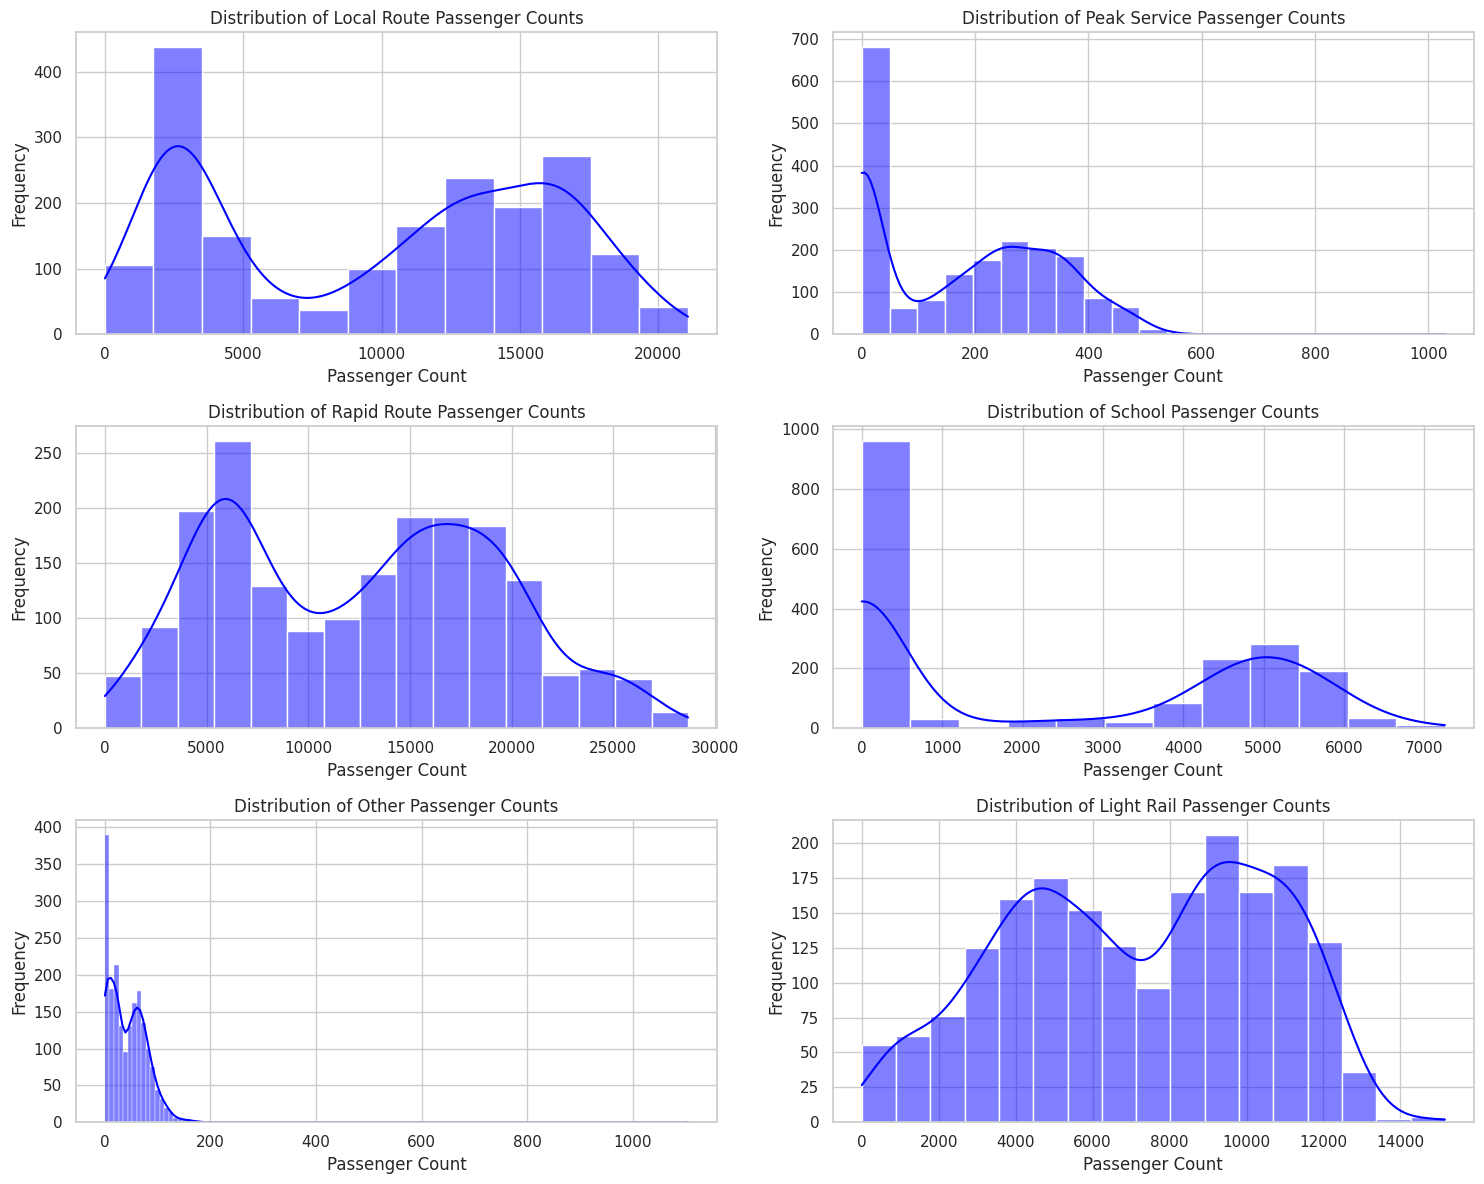

In [13]:


services = ['Local Route', 'Peak Service', 'Rapid Route', 'School', 'Other','Light Rail']

plt.figure(figsize=(15, 12))

for i, service in enumerate(services, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 cols grid
    sns.histplot(df[service], kde=True, color='blue')
    plt.title(f'Distribution of {service} Passenger Counts')
    plt.xlabel('Passenger Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:

from prophet import Prophet



In [16]:
# Convert 'Date' to datetime
# df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Prepare dataframe for Prophet
light_rail_df = df[['Date', 'Light Rail']].rename(columns={'Date': 'ds', 'Light Rail': 'y'})


In [17]:
# Initialize the model
model = Prophet()

# Fit the model
model.fit(light_rail_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/k0gf5i3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/6afzwb1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54164', 'data', 'file=/tmp/tmp20upb16l/k0gf5i3s.json', 'init=/tmp/tmp20upb16l/6afzwb1q.json', 'output', 'file=/tmp/tmp20upb16l/prophet_modelf5hf06jr/prophet_model-20250603051523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# Make dataframe for future 7 days
future = model.make_future_dataframe(periods=7)

# Predict
forecast = model.predict(future)

In [20]:
print(df['Date'].head())

0   2024-08-30
1   2023-09-15
2   2021-12-28
3   2023-01-11
4   2021-09-11
Name: Date, dtype: datetime64[ns]


In [23]:
import matplotlib.dates as mdates


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/nb6ywpr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/7xc_rvhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11151', 'data', 'file=/tmp/tmp20upb16l/nb6ywpr3.json', 'init=/tmp/tmp20upb16l/7xc_rvhr.json', 'output', 'file=/tmp/tmp20upb16l/prophet_modelv4ifd5qd/prophet_model-20250603053046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


7-Day Light Rail Forecast:
             ds         yhat
1918 2024-09-30  7583.443077
1919 2024-10-01  8637.506094
1920 2024-10-02  8680.287395
1921 2024-10-03  8599.768342
1922 2024-10-04  8629.938528
1923 2024-10-05  5166.143206
1924 2024-10-06  3808.671451


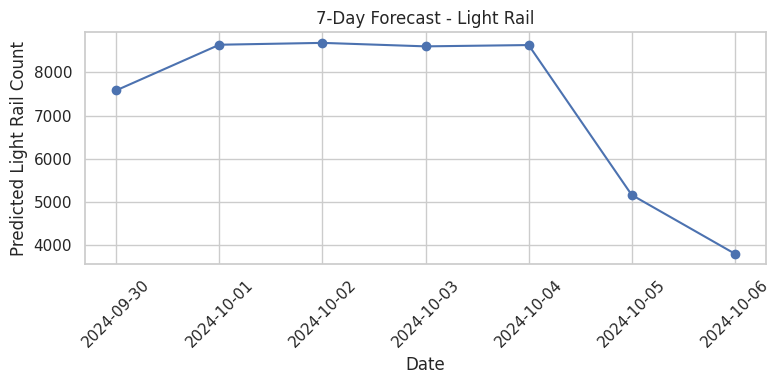

In [33]:
# Import necessary libraries
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Prepare your data for Prophet
# Prophet expects a DataFrame with columns 'ds' (date) and 'y' (value to forecast)
df_prophet = df[['Date', 'Light Rail']].rename(columns={'Date': 'ds', 'Light Rail': 'y'})

# Step 2: Create and train the Prophet model
model = Prophet()
model.fit(df_prophet)

# Step 3: Create a DataFrame to hold predictions for the next 7 days
future = model.make_future_dataframe(periods=7)  # 7 days into the future

# Step 4: Make predictions
forecast = model.predict(future)

# Step 5: Extract only the forecast for the next 7 days (excluding historical data)
forecast_next_7 = forecast.tail(7)[['ds', 'yhat']]

# Step 6: Print forecast table (optional, for viewers to see numeric results)
print("7-Day Light Rail Forecast:")
print(forecast_next_7)

# Step 7: Plot a simple, clear line chart for the forecast only
plt.figure(figsize=(8, 4))
plt.plot(forecast_next_7['ds'], forecast_next_7['yhat'], marker='o', linestyle='-')
plt.title('7-Day Forecast - Light Rail')
plt.xlabel('Date')
plt.ylabel('Predicted Light Rail Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
print(forecast_next_7)

             ds         yhat
1918 2024-09-30  7583.443077
1919 2024-10-01  8637.506094
1920 2024-10-02  8680.287395
1921 2024-10-03  8599.768342
1922 2024-10-04  8629.938528
1923 2024-10-05  5166.143206
1924 2024-10-06  3808.671451


In [35]:
print(df_prophet['ds'].max())


2024-09-29 00:00:00


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/ocryjts6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/ut2df0jx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2136', 'data', 'file=/tmp/tmp20upb16l/ocryjts6.json', 'init=/tmp/tmp20upb16l/ut2df0jx.json', 'output', 'file=/tmp/tmp20upb16l/prophet_model96ae0wy4/prophet_model-20250603053950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



7-Day Forecast for Local Route:
             ds          yhat
1918 2024-09-30  10495.099677
1919 2024-10-01  12290.212671
1920 2024-10-02  12454.564899
1921 2024-10-03  12304.106031
1922 2024-10-04  11774.630519
1923 2024-10-05   2626.683795
1924 2024-10-06   1701.722160


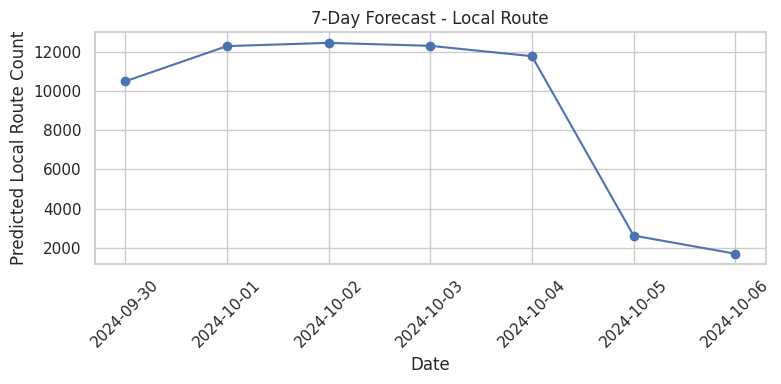

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/zmw4dswc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/meyw7w8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28035', 'data', 'file=/tmp/tmp20upb16l/zmw4dswc.json', 'init=/tmp/tmp20upb16l/meyw7w8_.json', 'output', 'file=/tmp/tmp20upb16l/prophet_modellrnxm78e/prophet_model-20250603053952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



7-Day Forecast for Light Rail:
             ds         yhat
1918 2024-09-30  7583.443077
1919 2024-10-01  8637.506094
1920 2024-10-02  8680.287395
1921 2024-10-03  8599.768342
1922 2024-10-04  8629.938528
1923 2024-10-05  5166.143206
1924 2024-10-06  3808.671451


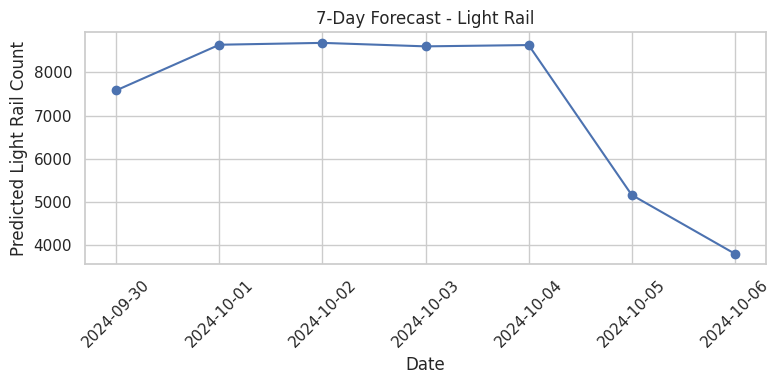

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/zqf1g22r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/axiykl73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91520', 'data', 'file=/tmp/tmp20upb16l/zqf1g22r.json', 'init=/tmp/tmp20upb16l/axiykl73.json', 'output', 'file=/tmp/tmp20upb16l/prophet_modelupqc_050/prophet_model-20250603053953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



7-Day Forecast for Peak Service:
             ds        yhat
1918 2024-09-30  223.811426
1919 2024-10-01  269.251305
1920 2024-10-02  269.020228
1921 2024-10-03  242.469110
1922 2024-10-04  190.810618
1923 2024-10-05  -11.079756
1924 2024-10-06   -9.691342


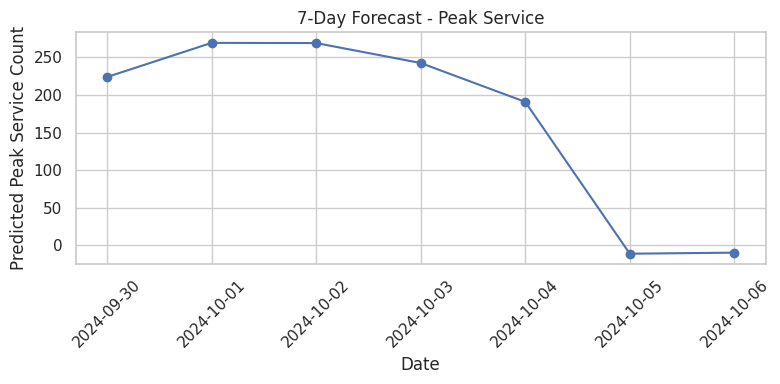

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/pbdtnupw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/c9y8o2_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42446', 'data', 'file=/tmp/tmp20upb16l/pbdtnupw.json', 'init=/tmp/tmp20upb16l/c9y8o2_u.json', 'output', 'file=/tmp/tmp20upb16l/prophet_model8fl_s3ap/prophet_model-20250603053954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



7-Day Forecast for Rapid Route:
             ds          yhat
1918 2024-09-30  13451.439464
1919 2024-10-01  15558.779105
1920 2024-10-02  15645.997454
1921 2024-10-03  15456.805596
1922 2024-10-04  14750.267918
1923 2024-10-05   6564.267773
1924 2024-10-06   5115.324841


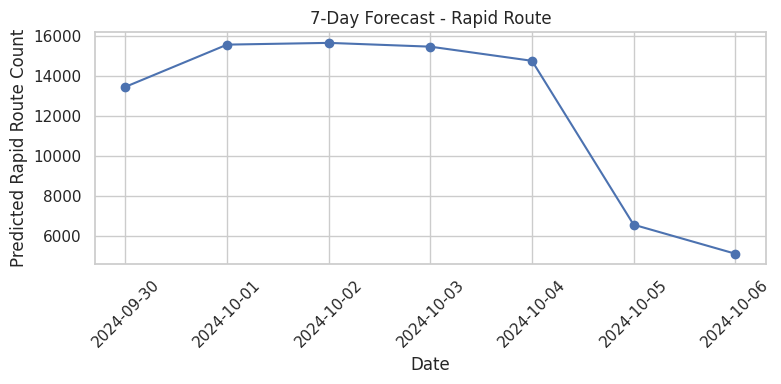

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/vnbhsd9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp20upb16l/v2x5y4ac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12672', 'data', 'file=/tmp/tmp20upb16l/vnbhsd9z.json', 'init=/tmp/tmp20upb16l/v2x5y4ac.json', 'output', 'file=/tmp/tmp20upb16l/prophet_modelwrnw9e9q/prophet_model-20250603053955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



7-Day Forecast for School:
             ds         yhat
1918 2024-09-30  1424.605397
1919 2024-10-01  1848.711346
1920 2024-10-02  1909.190565
1921 2024-10-03  1811.524961
1922 2024-10-04  1629.324184
1923 2024-10-05 -1410.416213
1924 2024-10-06 -1301.995643


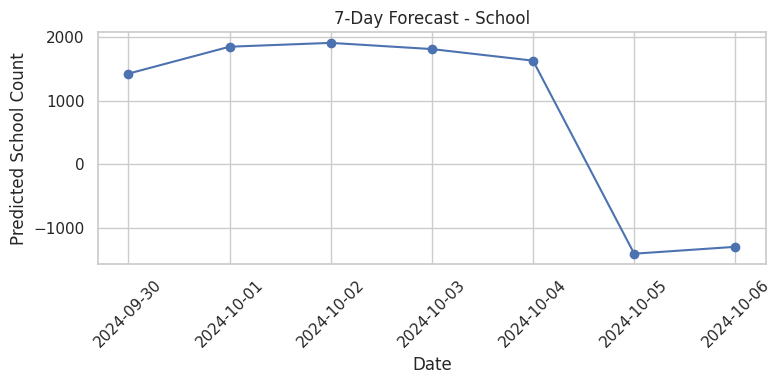

In [36]:
from prophet import Prophet
import matplotlib.pyplot as plt

def forecast_and_plot(df, date_col, target_col, periods=7):
    """
    Forecast 'target_col' for next 'periods' days using Prophet.
    df: Original dataframe with date and target columns
    date_col: Name of date column (e.g. 'Date')
    target_col: Name of target column to forecast (e.g. 'Light Rail')
    periods: Number of days to forecast (default 7)
    """
    # Prepare data for Prophet
    df_prophet = df[[date_col, target_col]].rename(columns={date_col: 'ds', target_col: 'y'})

    # Train model
    model = Prophet()
    model.fit(df_prophet)

    # Get last date in historical data
    last_date = df_prophet['ds'].max()

    # Create future dataframe with extra buffer
    future = model.make_future_dataframe(periods=periods + 1)

    # Predict
    forecast = model.predict(future)

    # Extract only future dates strictly after last historical date
    future_forecast = forecast[forecast['ds'] > last_date][['ds', 'yhat']]

    # Take exactly 'periods' rows
    future_forecast = future_forecast.head(periods)

    # Print results
    print(f"\n7-Day Forecast for {target_col}:")
    print(future_forecast)

    # Plot forecast
    plt.figure(figsize=(8, 4))
    plt.plot(future_forecast['ds'], future_forecast['yhat'], marker='o', linestyle='-')
    plt.title(f'7-Day Forecast - {target_col}')
    plt.xlabel('Date')
    plt.ylabel(f'Predicted {target_col} Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Example usage:
columns_to_forecast = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for col in columns_to_forecast:
    forecast_and_plot(df, 'Date', col, periods=7)


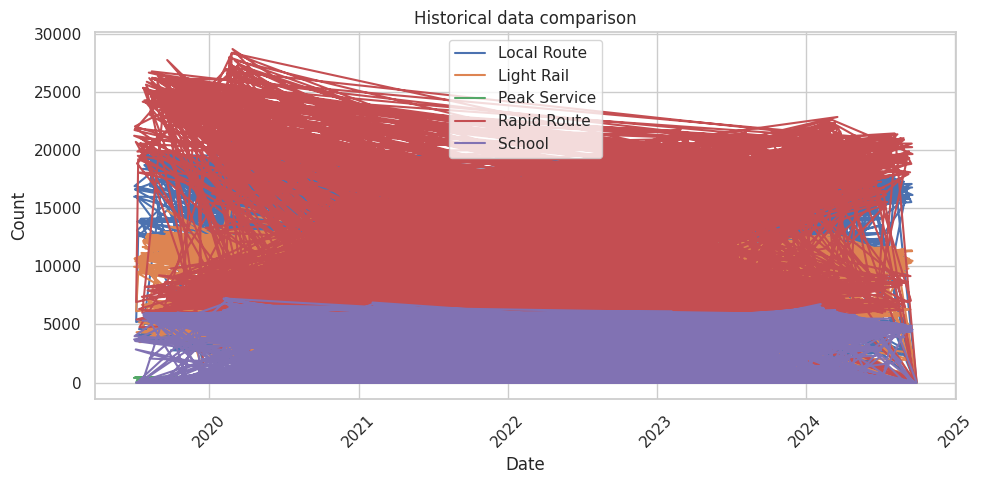

In [37]:
plt.figure(figsize=(10,5))
for col in columns_to_forecast:
    plt.plot(df['Date'], df[col], label=col)
plt.legend()
plt.title('Historical data comparison')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
